# Competición Regresión

### VENTA DE VEHÍCULOS DE SEGUNDA MANO 

Los vehículos sin eléctricos y sin conductor están cada día más cerca. No obstante, y pese al descenso de las ventas de vehículos en los últimos tiempos, existe un mercado de vehículos de segunda mano que cobra fuerza. Los coches son más que una herramienta para muchos. En algunos casos, hasta se trata de joyas y status. 

En este ejercicio se propone la **limpieza y el análisis exploratorio de un conjunto de datos de venta de segunda mano de vehículos**, que contiene las siguientes variables (entre paréntesis el nombre que sustituirá a la variable original): 

**- Name:(Nombre)** En esta variable se indica la marca y el modelo del coche.

**- Location: (Localizacion)** Lugar donde el vehículo se vende. 

**- Year: (Año)** Edición del modelo.

**- Kilometers_Driven (Km_conducidos)** Número de km realizados por los anteriores propietarios del vehículo.

**- Fuel_Type: (Tipo_combustible)** Tipo de combustible que usa el vehículo.

**- Transmission: (Transmision)** Tipo de transmisión que usa el vehículo.

**- Owner_Type: (Tipo_cliente)** Indica si el dueño del vehículo ha sido el primero, segundo u otro.

**- Mileage: (Mileage)** Indica el número de km por kg o litro de combustible.

**- Engine: (Motor)** Cilindrada del vehículo.

**- Power: (Potencia)** Potencia máxima del motor.

**- Seats: (Plazas)** Número de plazas que tiene el coche.

**- New_Price: (Precio_Nuevo)** Coste de un coche nuevo del mismo modelo.

**- Price: (Precio)** Precio del vehículo usado en INR Lakhs.

**En primer lugar debemos importar las librerías que utilizaremos para el desarrollo del ejercicio:**

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

**A continuación importamos el dataset y visualizamos los primeros cinco registros:**

In [144]:
dataset= pd.read_excel("../data/uso_vehiculos.xlsx")
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**El siguiente paso será visualizar las columnas de las que está formado nuestro dataset:**

In [145]:
dataset.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

**A continuación renombramos las columnas tal y como se indica en la descripción del ejercicio:**

In [146]:
dataset = dataset.rename(index = str ,columns = {'Name': 'Nombre', 'Location': 'Localizacion', 'Year': 'Año', 
                                       'Kilometers_Driven': 'Km_conducidos', 'Fuel_Type':'Tipo_combustible',
                                       'Transmission':'Transmision', 'Owner_Type':'Tipo_cliente', 'Engine':'Motor', 
                                       'Power': 'Potencia', 'Seats':'Plazas','New_Price':'Precio_Nuevo', 
                                       'Price':'Precio'})
dataset.head(5)
dataset["Precio_Nuevo"][0]

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/3686048721.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset["Precio_Nuevo"][0]


nan

**Visualizamos el tamaño del dataset:**

In [147]:
dataset.shape

(6019, 13)

**Visualizamos los tipos de datos de cada variable:**

In [148]:
dataset.dtypes

Nombre               object
Localizacion         object
Año                   int64
Km_conducidos         int64
Tipo_combustible     object
Transmision          object
Tipo_cliente         object
Mileage              object
Motor                object
Potencia             object
Plazas              float64
Precio_Nuevo         object
Precio              float64
dtype: object

**Realizamos un análisis estadístico descriptivo de las variables numéricas:**

In [149]:
dataset.describe()

,Año,Km_conducidos,Plazas,Precio
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


**Realizamos un análisis estadístico descriptivo de las variables categóricas:**

In [150]:
dataset.describe(include=object)

,Nombre,Localizacion,Tipo_combustible,Transmision,Tipo_cliente,Mileage,Motor,Potencia,Precio_Nuevo
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


### DATA CLEANING 

En este punto comenzaremos con la limpieza de los datos. Transformaremos variables, estudiaremos la existencia de outliers y trataremos los valores nulos.

**En primer lugar, dividimos la variable nombre en dos nuevas variables: Marca y Modelo y las añadimos al dataset:**

In [151]:
marca = []
modelo = []
for i in range(len(dataset)):
    nombre = dataset["Nombre"][i].split()
    marca.append(nombre[0])
    modelo.append(' '.join(nombre[1:]))

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/2710800843.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nombre = dataset["Nombre"][i].split()


In [152]:
print('MARCAS: ' + str(marca[:20]))

MARCAS: ['Maruti', 'Hyundai', 'Honda', 'Maruti', 'Audi', 'Hyundai', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Maruti', 'Honda', 'Maruti', 'Land', 'Land', 'Mitsubishi', 'Honda', 'Maruti', 'Renault', 'Mercedes-Benz']


In [153]:
print('MODELOS: ' + str(modelo[:20]))

MODELOS: ['Wagon R LXI CNG', 'Creta 1.6 CRDi SX Option', 'Jazz V', 'Ertiga VDI', 'A4 New 2.0 TDI Multitronic', 'EON LPG Era Plus Option', 'Micra Diesel XV', 'Innova Crysta 2.8 GX AT 8S', 'Vento Diesel Comfortline', 'Indica Vista Quadrajet LS', 'Ciaz Zeta', 'City 1.5 V AT Sunroof', 'Swift VDI BSIV', 'Rover Range Rover 2.2L Pure', 'Rover Freelander 2 TD4 SE', 'Pajero Sport 4X4', 'Amaze S i-Dtech', 'Swift DDiS VDI', 'Duster 85PS Diesel RxL Plus', 'New C-Class C 220 CDI BE Avantgare']


In [154]:
dataset["Marca"] = marca
dataset["Modelo"] = modelo

**A continuación separamos el Mileage de sus unidades y convertimos la variable en numérica:**

In [155]:
millas = []

for i in range(len(dataset)):
    try:
        millas.append(float(dataset["Mileage"][i].split()[0].strip()))
        
    except:
        millas.append(np.nan)

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/3430437586.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  millas.append(float(dataset["Mileage"][i].split()[0].strip()))


In [156]:
dataset["Mileage"] = millas
dataset.head(5)

,Nombre,Localizacion,Año,Km_conducidos,Tipo_combustible,Transmision,Tipo_cliente,Mileage,Motor,Potencia,Plazas,Precio_Nuevo,Precio,Marca,Modelo
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


**Realizamos un proceso similar para la potencia. Separamos el valor de la unidad y generamos la variable numérica:**

In [157]:
potencia = []

for i in range(len(dataset)):
    try:
        potencia.append(float(dataset["Potencia"][i].split()[0].strip()))
        
    except:
        potencia.append(np.nan)

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/3281469244.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  potencia.append(float(dataset["Potencia"][i].split()[0].strip()))


In [158]:
dataset["Potencia"] = potencia
dataset.head(5)

,Nombre,Localizacion,Año,Km_conducidos,Tipo_combustible,Transmision,Tipo_cliente,Mileage,Motor,Potencia,Plazas,Precio_Nuevo,Precio,Marca,Modelo
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


**Por último, repetimos el mismo proceso para la variable motor. Separamos las unidades del valor y convertimos la variable en numérica:**

In [159]:
motor = []

for i in range(len(dataset)):
    try:
        motor.append(float(dataset["Motor"][i].split()[0].strip()))
        
    except:
        motor.append(np.nan)

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/1227201802.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  motor.append(float(dataset["Motor"][i].split()[0].strip()))


In [160]:
dataset["Motor"] = motor
dataset.head(5)

,Nombre,Localizacion,Año,Km_conducidos,Tipo_combustible,Transmision,Tipo_cliente,Mileage,Motor,Potencia,Plazas,Precio_Nuevo,Precio,Marca,Modelo
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


### Métodos imputacion NA 

In [161]:
aux = dataset.isnull().sum()

porcentaje = (aux/len(dataset))*100
print("NÚMERO DE NA: ")
print(aux[aux>0])
print("")
print("PORCENTAJE DE NA: ")
print(porcentaje[porcentaje>0])

NÚMERO DE NA: 
Mileage            2
Motor             36
Potencia         143
Plazas            42
Precio_Nuevo    5195
dtype: int64

PORCENTAJE DE NA: 
Mileage          0.033228
Motor            0.598106
Potencia         2.375810
Plazas           0.697790
Precio_Nuevo    86.310018
dtype: float64


### TRATAMIENTO DE NA (Missing Values)

**Para la variable Precio_Nuevo, con 86.3 % de missing, eliminamos la variable al completo:**

In [162]:
dataset = dataset.drop(axis = 1 , columns= ["Precio_Nuevo"])

**Para la variable Plazas (categórica), imputamos por la moda:**

In [163]:
dataset['Plazas'].value_counts().idxmax()

np.float64(5.0)

In [164]:
dataset['Plazas'] = dataset['Plazas'].fillna(dataset['Plazas'].value_counts().idxmax())

**Para la variable Motor, imputamos por la moda:**

In [165]:
dataset['Motor'] = dataset['Motor'].fillna(dataset['Motor'].value_counts().idxmax())

**Para la variable Mileage, imputamos por la mediana:**

In [166]:
dataset['Mileage'].median()

np.float64(18.15)

In [167]:
dataset['Mileage'] = dataset['Mileage'].fillna(dataset['Mileage'].median())

**Para la variable Potencia imputamos por la mediana dependiendo del valor de la variable Tipo_combustible:**

Generamos una lista con los niveles de la variable Tipo_combustible

In [168]:
vector_tipo_combustible = dataset['Tipo_combustible'].unique()
vector_tipo_combustible

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

Calculamos la mediana de Potencia para cada uno los niveles anteriores:

In [169]:
lista_combustibles_medianas = []
for tipo_combustible in vector_tipo_combustible:
    print("Mediana Potencia para " + 
          tipo_combustible + ": "+ 
          str(dataset[dataset['Tipo_combustible']==tipo_combustible]['Potencia'].median()))
    lista_combustibles_medianas.append(dataset[dataset['Tipo_combustible']==tipo_combustible]['Potencia'].median())

Mediana Potencia para CNG: 58.2
Mediana Potencia para Diesel: 108.5
Mediana Potencia para Petrol: 83.1
Mediana Potencia para LPG: 58.2
Mediana Potencia para Electric: 57.0


Sustituimos los nan por los valores de la mediana en cada caso

In [170]:
import math

lista_combustible_na = []
for i in range(len(dataset)):
    if math.isnan(dataset["Potencia"][i]): 
        if dataset["Tipo_combustible"][i] == 'CNG':
            lista_combustible_na.append(lista_combustibles_medianas[0])

        if dataset["Tipo_combustible"][i] == 'Diesel':
            lista_combustible_na.append( lista_combustibles_medianas[1])

        if dataset["Tipo_combustible"][i] == 'Petrol':
            lista_combustible_na.append( lista_combustibles_medianas[2])

        if dataset["Tipo_combustible"][i] == 'LPG':
            lista_combustible_na.append( lista_combustibles_medianas[3])

        if dataset["Tipo_combustible"][i] == 'Electric':
            lista_combustible_na.append(lista_combustibles_medianas[4])
    else:
        lista_combustible_na.append(dataset["Potencia"][i])

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/432309857.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if math.isnan(dataset["Potencia"][i]):
/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/432309857.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lista_combustible_na.append(dataset["Potencia"][i])
/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_49396/432309857.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

In [171]:
dataset = dataset.drop(axis = 1, columns = ["Potencia"])

In [172]:
dataset.insert(len(dataset.columns), "Potencia", lista_combustible_na)

### TRATAMIENTO DE OUTLIERS 

Text(0.5, 1.0, 'DITRIBUCION Precio')

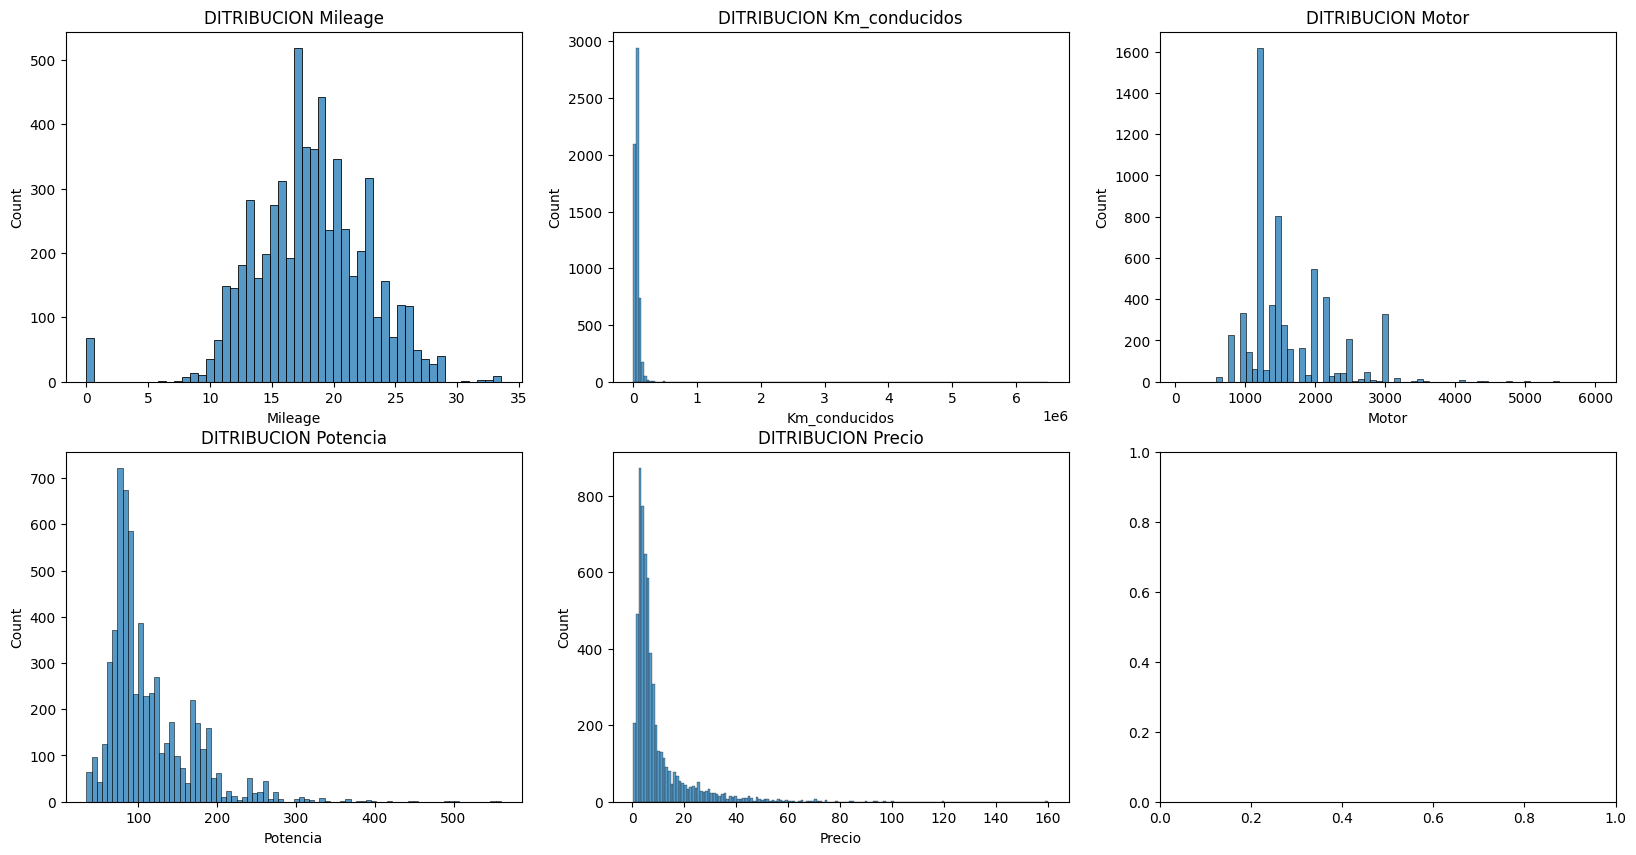

In [173]:
fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))

sns.histplot(dataset['Mileage'], ax=axs[0,0] ).set_title(str("DITRIBUCION Mileage"))
sns.histplot(dataset['Km_conducidos'], ax=axs[0,1] ).set_title(str("DITRIBUCION Km_conducidos"))
sns.histplot(dataset['Motor'], ax=axs[0,2] ).set_title(str("DITRIBUCION Motor"))
sns.histplot(dataset['Potencia'], ax=axs[1,0] ).set_title(str("DITRIBUCION Potencia"))
sns.histplot(dataset['Precio'], ax=axs[1,1] ).set_title(str("DITRIBUCION Precio"))

In [174]:
dataset_numerico =dataset[["Km_conducidos","Potencia" , "Precio"]]

Calculamos si para cada una de las variables seleccionadas existe outlier (lo marcamos con verdadero en el caos de existir)

In [175]:
Q1 = dataset_numerico.quantile(0.25)
Q3 = dataset_numerico.quantile(0.75)
IQR = Q3 - Q1
dataset_numerico =(dataset_numerico < (Q1 - 2 * IQR)) |(dataset_numerico > (Q3 + 2 * IQR))
dataset_numerico.head(5)

,Km_conducidos,Potencia,Precio
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


Seleccionamos los registros que no tienen ningún outlier:

In [176]:
count = 0
indice = []
for row in range(len(dataset_numerico)):
    if True not in np.array(dataset_numerico.iloc[row, :]):
        indice.append(str(count))
    count = count + 1
    #print(row)

In [177]:
dataset = dataset.loc[indice, : ]

Text(0.5, 1.0, 'DITRIBUCION Precio')

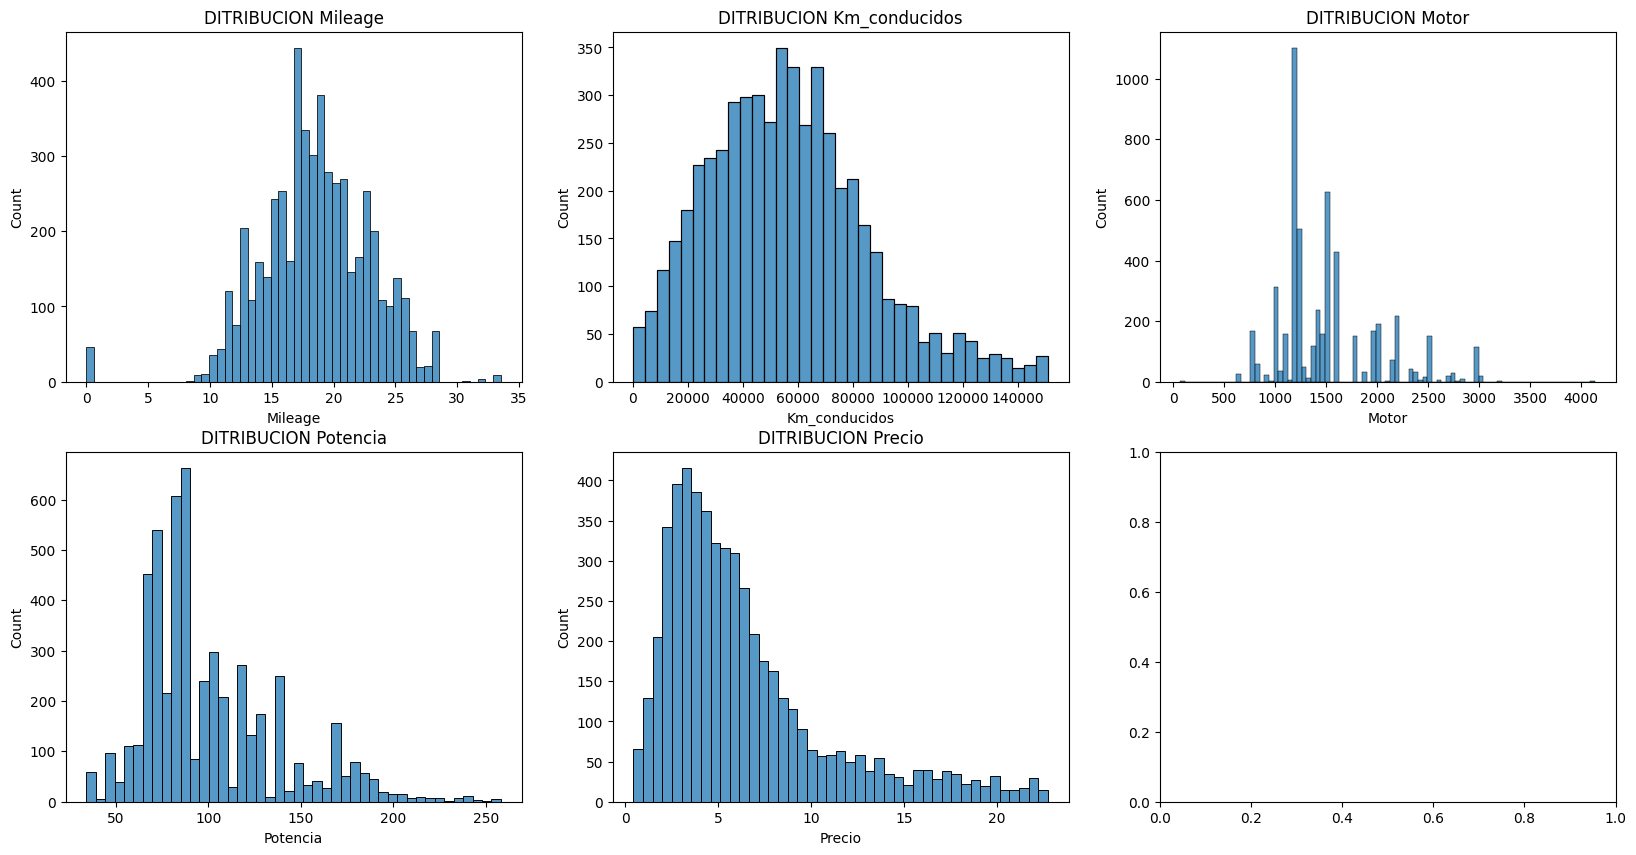

In [178]:
fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))

sns.histplot(dataset['Mileage'], ax=axs[0,0] ).set_title(str("DITRIBUCION Mileage"))
sns.histplot(dataset['Km_conducidos'], ax=axs[0,1] ).set_title(str("DITRIBUCION Km_conducidos"))
sns.histplot(dataset['Motor'], ax=axs[0,2] ).set_title(str("DITRIBUCION Motor"))
sns.histplot(dataset['Potencia'], ax=axs[1,0] ).set_title(str("DITRIBUCION Potencia"))
sns.histplot(dataset['Precio'], ax=axs[1,1] ).set_title(str("DITRIBUCION Precio"))

In [179]:
dataset.head()

,Nombre,Localizacion,Año,Km_conducidos,Tipo_combustible,Transmision,Tipo_cliente,Mileage,Motor,Plazas,Precio,Marca,Modelo,Potencia
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0,1.75,Maruti,Wagon R LXI CNG,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,4.50,Honda,Jazz V,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,6.00,Maruti,Ertiga VDI,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80


In [180]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_numerics = dataset.select_dtypes(include=numerics)
data_numerics = pd.concat([data_numerics, pd.get_dummies(dataset["Marca"], drop_first = True)], axis = 1)
data_numerics.head()

,Año,Km_conducidos,Mileage,Motor,Plazas,Precio,Potencia,Audi,BMW,Chevrolet,...,Mini,Mitsubishi,Nissan,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,26.60,998.0,5.0,1.75,58.16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000,19.67,1582.0,5.0,12.50,126.20,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,46000,18.20,1199.0,5.0,4.50,88.70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2012,87000,20.77,1248.0,7.0,6.00,88.76,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013,40670,15.20,1968.0,5.0,17.74,140.80,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# PREDECIR EL PRECIO

In [181]:
X = data_numerics.drop("Precio", axis = 1)
Y = data_numerics['Precio']

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [183]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [184]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [185]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)):
    sbs = SFS(LinearRegression(),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), y_train)
    sbs.k_feature_names_
    regression = LinearRegression()
    regression.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]], y_train)
    y_pred = regression.predict(X_test_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]])
    r2 = r2_score(y_pred = y_pred, y_true = y_test)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({"variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],"r2": r2})],ignore_index = True)


In [186]:
dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)

,variables,r2
0,"[Año, Km_conducidos, Motor, Plazas, Potencia, ...",0.805505
1,"[Año, Km_conducidos, Motor, Plazas, Potencia, ...",0.805505
2,"[Año, Km_conducidos, Motor, Plazas, Potencia, ...",0.805505
3,"[Año, Km_conducidos, Motor, Plazas, Potencia, ...",0.805495
4,"[Año, Motor, Plazas, Potencia, Audi, BMW, Chev...",0.805480
5,"[Año, Km_conducidos, Motor, Plazas, Potencia, ...",0.805319
6,"[Año, Motor, Plazas, Potencia, Audi, BMW, Chev...",0.804931
7,"[Año, Km_conducidos, Mileage, Motor, Plazas, P...",0.804906
8,"[Año, Motor, Plazas, Potencia, Audi, BMW, Chev...",0.804851
9,"[Año, Km_conducidos, Motor, Plazas, Potencia, ...",0.804696


In [187]:
X = data_numerics[dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)["variables"][0]]

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [189]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [190]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [191]:
from math import sqrt
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.0153320398396417
R2 score is 0.8019437605938623


The model performance for testing set
--------------------------------------
RMSE is 2.006157290988113
R2 score is 0.8055052280786266


### Aplicamos gridsearch sobre las variables seleccionadas

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [193]:
parameters = {'min_samples_split': [10, 20, 40, 60, 80, 100],
                  'min_samples_leaf': [5, 10, 15, 20],
                  'max_depth': [4, 6, 8, 10]
                 }

In [194]:
grid_tree = GridSearchCV(estimator=regressor, param_grid = parameters)

In [195]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [5, 10, ...], 'min_samples_split': [10, 20, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [196]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                      random_state=0)

 The best score across ALL searched params:
 0.7978908284489137

 The best parameters across ALL searched params:
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [197]:
# model evaluation for training set

y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.best_estimator_.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.4932130575545532
MSE is 2.229685235251418
R2 score is 0.8912726337967548


The model performance for testing set
--------------------------------------
RMSE is 1.843208883020172
MSE is 3.39741898644447
R2 score is 0.8358174183400392


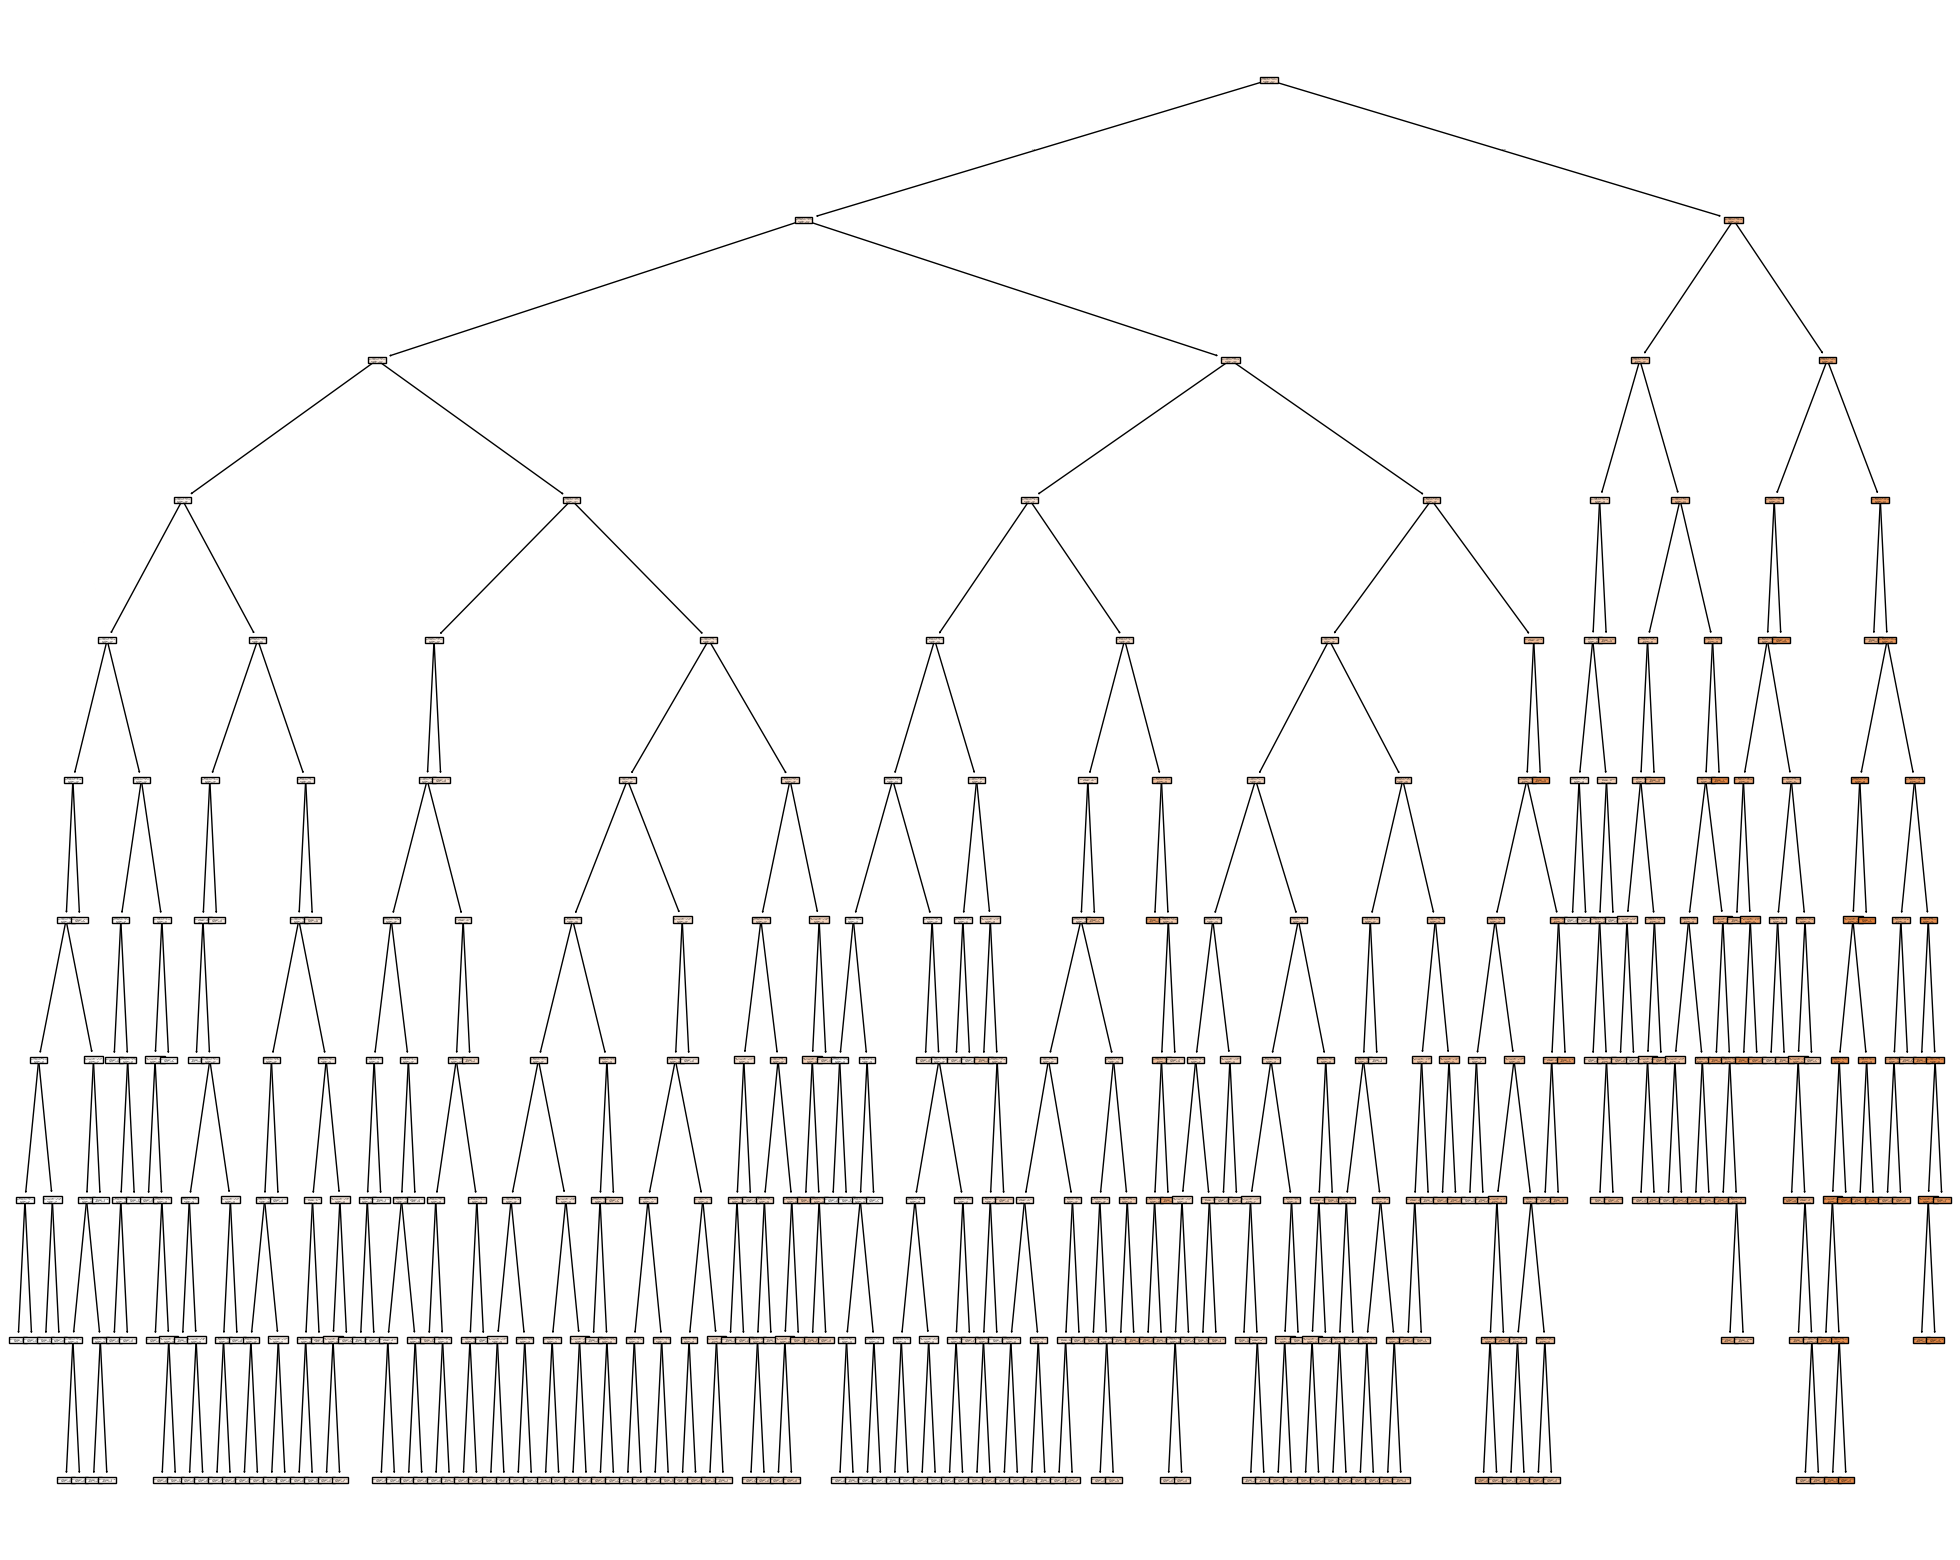

In [199]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_tree.best_estimator_, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)